In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt            #Seance 10
import plotly.express as px      #how to use: https://plotly.com/python/      

In [17]:
#https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/download?datasetVersionNumber=1     
#comment faire pour que sa downlaod le zip file puis prenne le csv dedans

In [18]:
data = pd.read_csv(r"C:\Users\logan\OneDrive\Documents\Life Expectancy Data.csv", delimiter=',')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
#Remplacer les null par le mode (pk le mode est pas le mean ? chercher sur internet)
for colonne in data.columns:
    if data[colonne].isnull().any()== True:
        mode=data[colonne].mode()[0]
        data[colonne]=data[colonne].fillna(mode)

In [21]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [22]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.00000,2938.000000
mean,2007.518720,69.237781,164.276378,30.303948,4.299588,738.251295,84.339687,2419.592240,38.554765,42.035739,82.656569,5.835252,82.431926,1.742103,6342.347799,9.923249e+06,4.795269,4.824370,0.59188,12.043125
std,4.613841,9.510183,124.399126,117.926501,4.079052,1987.914858,23.664672,11467.272489,20.044238,160.445548,23.389352,2.426626,23.677846,5.077785,13409.380598,5.407584e+07,4.413688,4.502781,0.25114,3.270983
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.00000,0.000000
25%,2004.000000,63.200000,73.000000,0.000000,0.470000,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,190.174435,5.874250e+03,1.500000,1.500000,0.46500,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.130000,64.912906,95.000000,17.000000,43.900000,4.000000,93.000000,5.540000,93.000000,0.100000,1171.983435,5.393575e+05,3.300000,3.300000,0.66200,12.500000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,99.000000,360.250000,56.475000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.77200,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


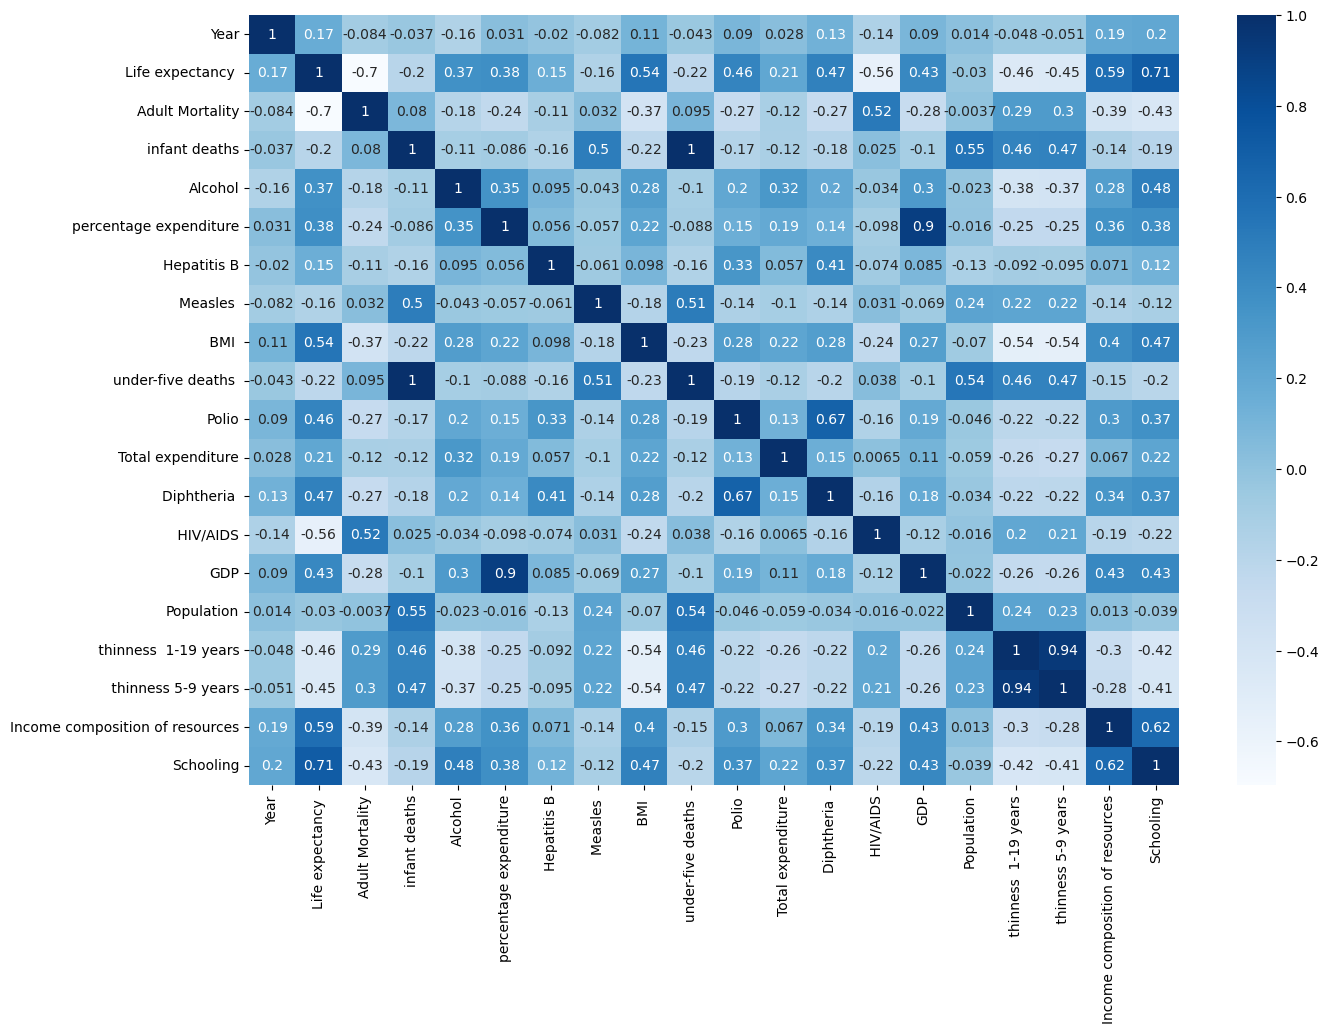

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

#Correlation


sns.pairplot(
    data = data[[ "Alcohol", "GDP", "Status", "Life expectancy "]],
    hue = 'Status' , palette = ['Violet', 'Blue']);


# Question1! 

faire un graphique heat map par pays (map du monde) des esperance de vie les plus élevé



In [30]:
import folium
import pandas as pd

# Chargement des données sur le PIB par habitant de la Banque mondiale

# Filtre les données pour n'avoir que l'année 2015
data = data[data['Year'] == 2015]

# Filtre les données pour n'avoir que les pays avec un statut "Developed" ou "Developing"

# Création d'une carte centrée sur l'Afrique
map = folium.Map(location=[0, 0], zoom_start=2)

# Ajout d'un marqueur pour chaque pays
for index, row in data.iterrows():
    if row['Status'] == 'Developed':
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['Country'], icon=folium.Icon(color='green')).add_to(map)
    else:
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['Country'], icon=folium.Icon(color='red')).add_to(map)

# Affichage de la carte
map


KeyError: 'latitude'

In [34]:
import folium
import pandas as pd

from geopy.geocoders import Nominatim


# Filtre les données pour n'avoir que l'année 2015
data = data[data['Year'] == 2015]

# Création d'une carte centrée sur l'Afrique
map = folium.Map(location=[0, 0], zoom_start=2)

# Initialisation de l'objet Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Boucle à travers les pays et ajoute des marqueurs sur la carte
for index, row in data.iterrows():
    # Géocode le nom du pays en latitude et longitude
    location = geolocator.geocode(row['Country'])
    if location:
        # Ajoute un marqueur sur la carte avec le nom du pays
        folium.Marker(location=[location.latitude, location.longitude], popup=row['Country']).add_to(map)

# Affichage de la carte
map


In [35]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim



# Filtre les données pour n'avoir que l'année 2015
data = data[data['Year'] == 2015]


# Création d'une carte centrée sur l'Afrique
map = folium.Map(location=[0, 0], zoom_start=2)

# Initialisation de l'objet Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Boucle à travers les pays et ajoute des marqueurs sur la carte
for index, row in data.iterrows():
    # Géocode le nom du pays en latitude et longitude
    location = geolocator.geocode(row['Country'])
    if location:
        # Ajoute un marqueur sur la carte avec une couleur différente pour les pays "Developed" et "Developing"
        if row['Status'] == 'Developed':
            folium.Marker(location=[location.latitude, location.longitude], popup=row['Country'], icon=folium.Icon(color='green')).add_to(map)
        else:
            folium.Marker(location=[location.latitude, location.longitude], popup=row['Country'], icon=folium.Icon(color='red')).add_to(map)

# Affichage de la carte
map


In [1]:
pays en guerre vs non en guerre

SyntaxError: invalid syntax (5708508.py, line 1)

In [ ]:
pays haute ducations vs basse education